#                           WATER QUALITY PREDICTION

![water1.jpg](attachment:water1.jpg)

###### Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import anderson
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('D:\\Dataset\\Water.csv')

In [ ]:
df.head()

,Unnamed: 0,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
1,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
2,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
3,7,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,Colorless,0.047803,1.016196,...,2.325094,6.020000e-16,214.553104,River,15.891905,61.139140,April,11.0,4.0,0
4,9,7.100650,3.019038e-03,3.620641,157.043934,6.460000e-148,0.112994,Colorless,0.050613,0.842107,...,2.284971,8.840000e-07,113.909077,River,11.899376,14.010268,April,7.0,12.0,0


In [ ]:
df.shape

(701056, 24)

NOTE : Month , Date , Time is not important to Predict the Quality of Water Quality of So we Neglected that Things...

In [ ]:
df.drop(['Month','Day','Time of Day'],axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,0
1,2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,0
2,4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,0
3,7,7.258203,6.110000e-09,9.261676,182.242341,4.400000e-224,0.416478,Colorless,0.047803,1.016196,...,3.144199,114.551427,160.062557,2.325094,6.020000e-16,214.553104,River,15.891905,61.139140,0
4,9,7.100650,3.019038e-03,3.620641,157.043934,6.460000e-148,0.112994,Colorless,0.050613,0.842107,...,2.713379,167.417837,583.295321,2.284971,8.840000e-07,113.909077,River,11.899376,14.010268,0


###### Check Information About Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701056 entries, 0 to 701055
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              701056 non-null  int64  
 1   pH                      701056 non-null  float64
 2   Iron                    701056 non-null  float64
 3   Nitrate                 701056 non-null  float64
 4   Chloride                701056 non-null  float64
 5   Lead                    701056 non-null  float64
 6   Zinc                    701056 non-null  float64
 7   Color                   701056 non-null  object 
 8   Turbidity               701056 non-null  float64
 9   Fluoride                701056 non-null  float64
 10  Copper                  701056 non-null  float64
 11  Odor                    701056 non-null  float64
 12  Sulfate                 701056 non-null  float64
 13  Conductivity            701056 non-null  float64
 14  Chlorine            

NOTE : There is Two Object Datatypes in Our Dataset so we try to Change that in Our Comfort Zone that will do in EDA Section

##### Get Insights about Particular Columns

###### pH

pH stands for "potential of hydrogen." It is a scale used to measure the acidity or alkalinity (basicity) of a solution. The pH scale ranges from 0 to 14, with 7 being considered neutral. A pH value less than 7 indicates acidity, while a pH value greater than 7 indicates alkalinity.

In [ ]:
df.pH.max()

12.89196043

In [ ]:
df.pH.min()

2.058008219

<Axes: xlabel='pH', ylabel='Count'>

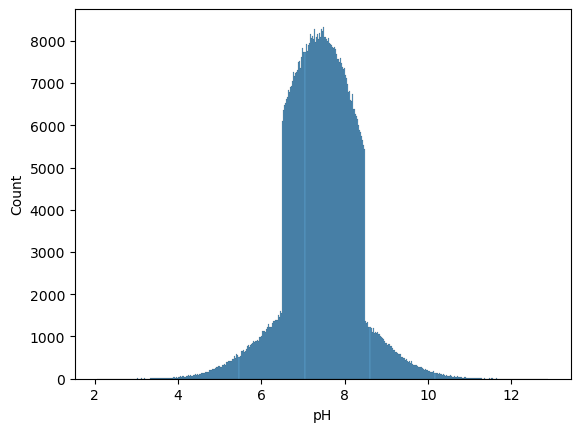

In [ ]:
sns.histplot(df.pH)

NOTE : In the pH Columns Most of Our Datapoints Lies in Between 6 to 8.5 and all the values are correct in normal pH level Range                       there is No unwanted values in Our Dataset

###### Iron

Iron is a chemical element with the symbol Fe (from the Latin word "ferrum") and atomic number 26. It is one of the most abundant elements on Earth and plays a crucial role in various aspects of our daily lives

In [ ]:
df.Iron.max()

15.74860273

In [ ]:
df.Iron.min()

8.01e-45

<Axes: xlabel='Iron', ylabel='Density'>

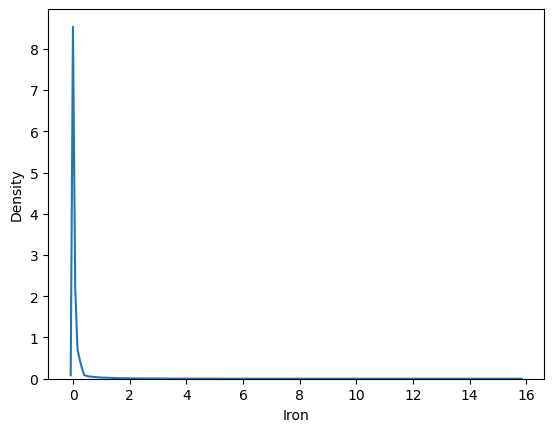

In [ ]:
sns.kdeplot(df.Iron)

NOTE : As we saw the plot of Iron Most of the values Comes Under the Range of 0 to 0.2 and some of the Values are Comes under 0.3 to 14 so it led to get lot of Outliers

###### Nitrate

Nitrate (NO3-) is a chemical compound that consists of one nitrogen atom (N) bonded to three oxygen atoms (O). It is an anion, meaning it carries a negative charge. Nitrate is an important component of the nitrogen cycle and is present in various forms in nature

In [ ]:
df.Nitrate.max()

69.73124391

In [ ]:
df.Nitrate.min()

0.286172715

<Axes: xlabel='Nitrate', ylabel='Count'>

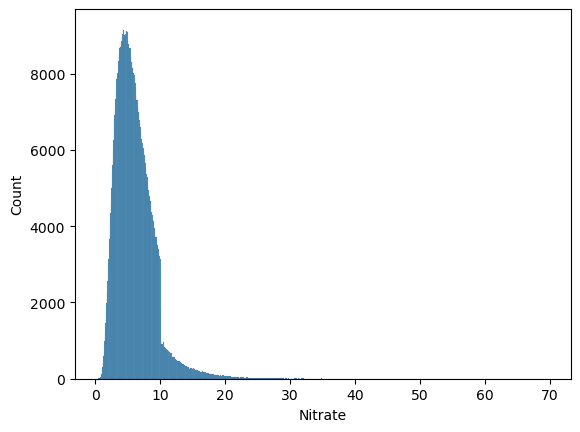

In [ ]:
sns.histplot(df.Nitrate)

NOTE : The Nitrate Content Most of Data lies InBetween 0 to 10 and some of Data lies Above the range so it let to get a lots of Outliers

###### Chloride

Chloride ions (Cl⁻) are commonly found in water sources, both natural and man-made. The presence of chloride in water can come from various sources, including natural geological processes, human activities, and pollution.

In [ ]:
df.Chloride.min()

29.41349666

In [ ]:
df.Chloride.max()

1430.548852

<Axes: xlabel='Chloride', ylabel='Count'>

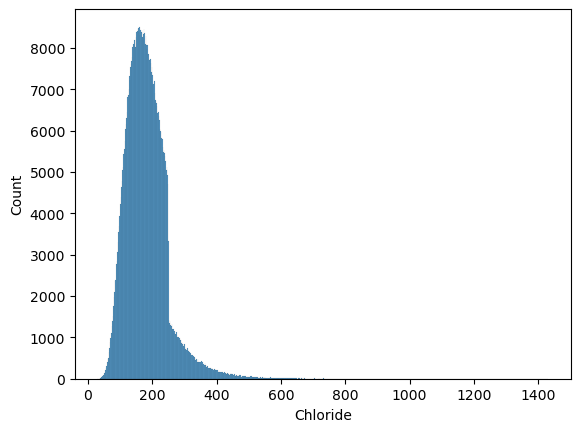

In [ ]:
sns.histplot(df.Chloride)

NOTE : Most of the datapoints are lies inbetween the Range of 0 to 300 and Some of the Values are Comes within the Range of 400 to 1400 So it let to Our Dataset have Lot of Outliers

###### Lead

Lead is a chemical element with the symbol Pb (from the Latin word "plumbum") and atomic number 82. It is a heavy metal that has been known and used by humans for thousands of years due to its malleability, low melting point, and other properties. However, lead is also highly toxic to humans and has been associated with serious health and environmental risks.

In [ ]:
df.Lead.min()

0.0

In [ ]:
df.Lead.max()

3.503947763

<Axes: xlabel='Lead', ylabel='Density'>

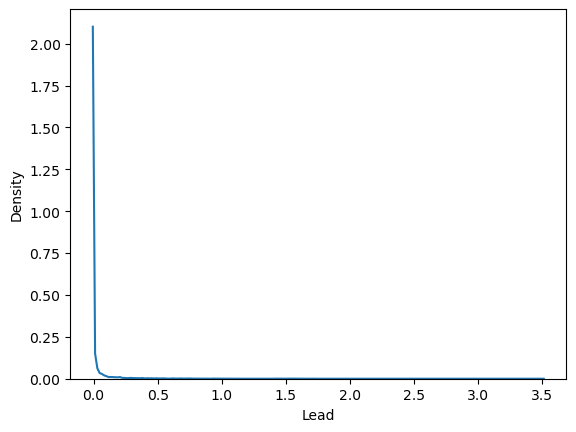

In [ ]:
sns.kdeplot(df.Lead)

NOTE : Lead Content is too harmful for childrens and pregent Ladies and there is much less content is pretty good and in our dataset the lead content are mostly lies in the range 0 so its not give any big impact of our Model

###### Zinc

Zinc is a chemical element with the symbol Zn and atomic number 30. It is a transition metal that is known for its bluish-white appearance, relatively low melting point, and various useful properties. Zinc has a wide range of applications in industry, medicine, and everyday life.

The World Health Organization (WHO) does not provide a specific guideline for zinc concentration in drinking water, but concentrations of up to 5 milligrams per liter (mg/L) are generally considered safe for human consumption.

In [ ]:
df.Zinc.min()

6.35e-07

In [ ]:
df.Zinc.max()

28.36867184

<Axes: xlabel='Zinc', ylabel='Count'>

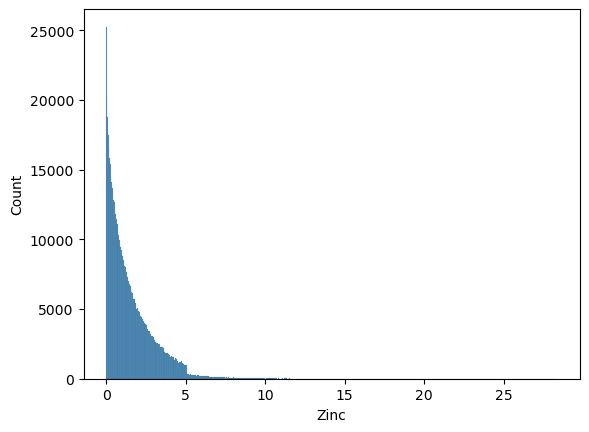

In [ ]:
sns.histplot(df.Zinc)

NOTE : Most of the DataPoints lies inBetween the Range of 0 to 2 and some of Datapoints lies above 3 and the Maximum value of Zinc is 28

###### Color

The color of water can vary depending on various factors, including the presence of dissolved substances, suspended particles, and natural or human-made contaminants. The color of water is a visual indicator that can provide insights into its quality and composition.

In [ ]:
df['Color'].unique()

array(['Faint Yellow', 'Light Yellow', 'Colorless', 'Near Colorless',
       'Yellow'], dtype=object)

<Axes: xlabel='Color', ylabel='count'>

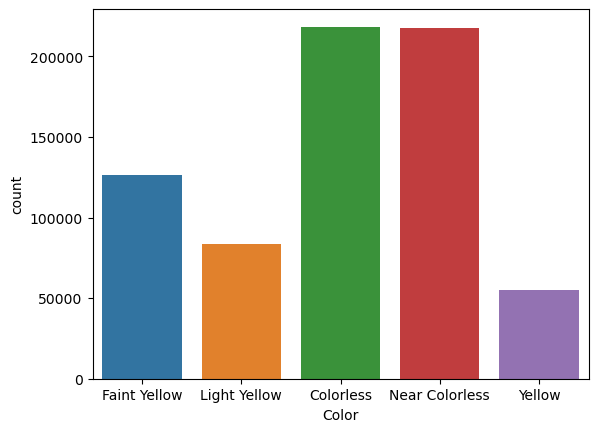

In [ ]:
sns.countplot(x=df['Color'])

NOTE : The Colorless and Near Colorless Counts are Higher Compare to other Colors

###### Turbidity

Turbidity refers to the cloudiness or haziness of a fluid caused by the presence of suspended particles that are not easily visible to the naked eye. It's a measure of the scattering and absorption of light by these particles within the liquid. Turbidity is often used as an indicator of water quality, especially in environmental monitoring and water treatment processes.

The U.S. Environmental Protection Agency (EPA) recommends that drinking water should have a turbidity level of less than 0.3 NTU at the treatment plant outlet.          
The World Health Organization (WHO) recommends a maximum turbidity level of 5 NTU in drinking water.

In [ ]:
df.Turbidity.min()

1.41e-14

In [ ]:
df.Turbidity.max()

19.29611286

<Axes: xlabel='Turbidity', ylabel='Density'>

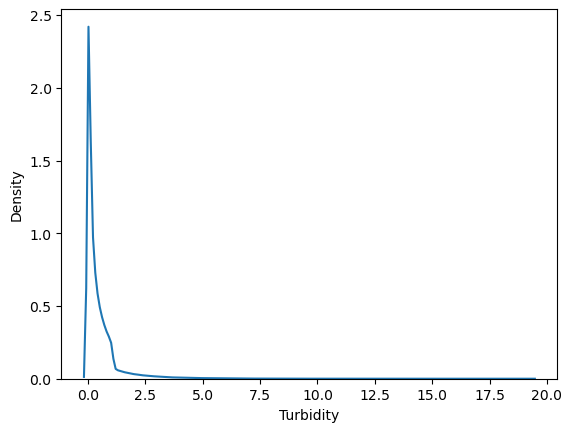

In [ ]:
sns.kdeplot(df.Turbidity)

NOTE : The Most of the Datapoints Lies inBetween the range of 0 to 1 and the Maximum Value of Turbidity is too High Compare to the Minimum Value so it led to have a lot of outliers

###### Fluoride

Fluoride is a naturally occurring compound that contains the element fluorine. It is commonly found in soil, water, rocks, and certain minerals. Fluoride has significant implications for human health, particularly in relation to dental health and water treatment.

In [ ]:
df.Fluoride.min()

4.55e-06

In [ ]:
df.Fluoride.max()

12.85170965

<Axes: xlabel='Fluoride', ylabel='Density'>

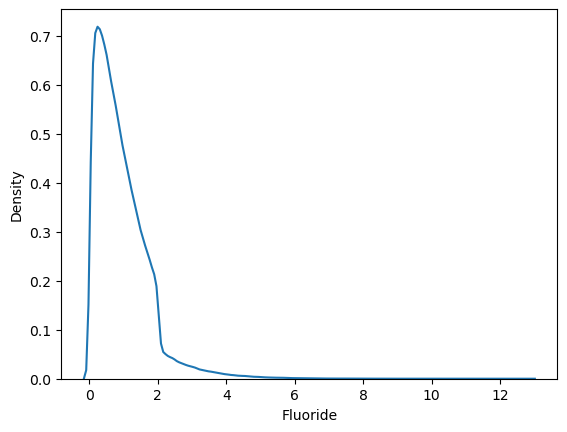

In [ ]:
sns.kdeplot(df.Fluoride)

NOTE : The Most of the datapoints lies inBetween the range of 0 to 2 annd some of the datapoints are lies above and the Maximum range is 12

###### Copper

Copper is a chemical element with the symbol Cu and atomic number 29. It is a versatile metal with a wide range of applications due to its excellent electrical conductivity, corrosion resistance, and malleability.

In [ ]:
df.Copper.min()

4.44e-08

In [ ]:
df.Copper.max()

10.71731979

<Axes: xlabel='Copper', ylabel='Density'>

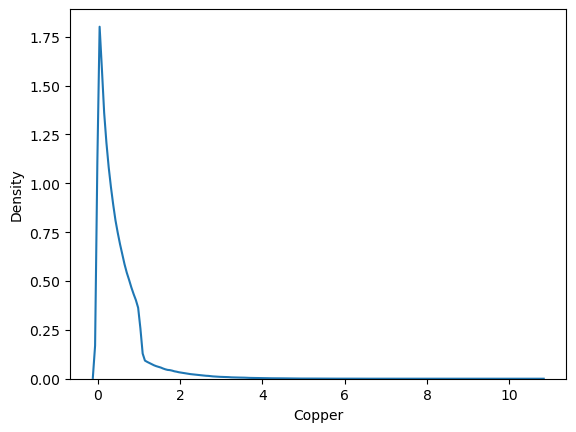

In [ ]:
sns.kdeplot(df.Copper)

NOTE : The Most of the datapoints lies inBetween the range of 0 to 1 annd some of the datapoints are lies above and the Maximum range is 11

###### Odor

Odor, also known as smell or olfaction, is one of the five senses that humans and many other animals use to perceive their environment. It involves detecting and identifying chemical compounds in the air that are released from various substances, including food, flowers, animals, and even human-made products

In [ ]:
df.Odor.min()

0.011006232

In [ ]:
df.Odor.max()

4.141952455

<Axes: xlabel='Odor', ylabel='Density'>

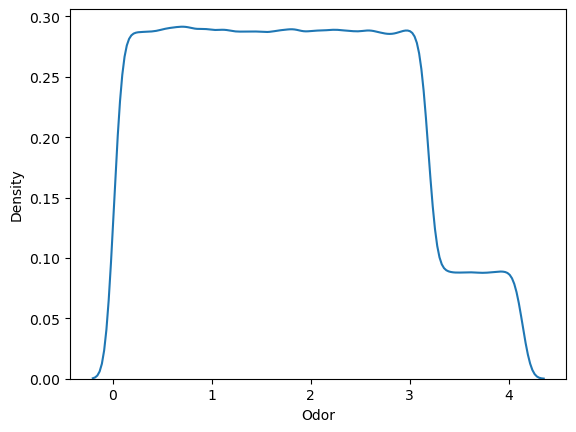

In [ ]:
sns.kdeplot(df.Odor)

NOTE : The Plot says that all the datapoints are lies equally in the dataset

###### Sulfate

Sulfate (SO₄²⁻) is a common ion that can be found naturally in water sources, including rivers, lakes, groundwater, and oceans. It originates from various geological, atmospheric, and anthropogenic sources. The presence of sulfate in water can have various effects on water quality, taste, and potential environmental impacts

In [ ]:
df.Sulfate.min()

11.9407271

In [ ]:
df.Sulfate.max()

1367.627291

<Axes: xlabel='Sulfate', ylabel='Density'>

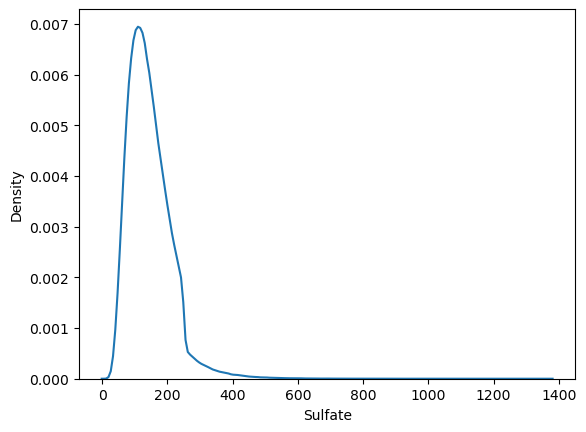

In [ ]:
sns.kdeplot(df.Sulfate)

NOTE : The Most of the datapoints lies inBetween the range of 0 to 200 annd some of the datapoints are lies above and the Maximum range is 1350

###### Conductivity , Chlorine and Manganese

Conductivity in water refers to its ability to conduct an electrical current. It is a measure of how well water can transmit electrical charges through the movement of ions and other charged particles. Conductivity is influenced by the presence of dissolved substances, such as salts and minerals, which dissociate into ions in the water. The higher the concentration of ions, the higher the water's conductivity.

Chlorine is a chemical element with the symbol Cl and atomic number 17. It is a highly reactive and versatile element that has numerous industrial, commercial, and household applications. Chlorine is often associated with its role as a disinfectant in water treatment and its presence in common household products.

Manganese is a chemical element with the symbol Mn and atomic number 25. It is a naturally occurring element that can be found in various minerals, rocks, and soil. Manganese can also be present in water sources, both in natural concentrations and as a result of human activities

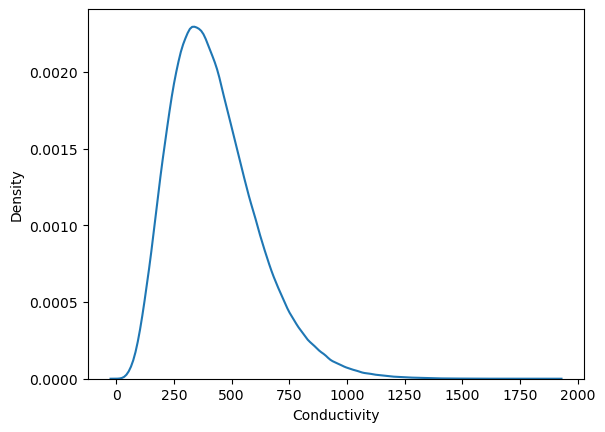

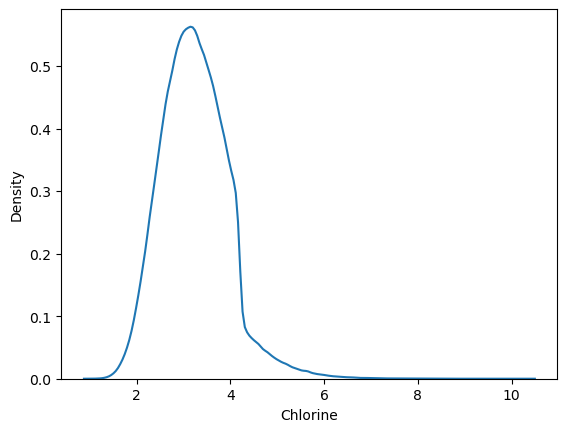

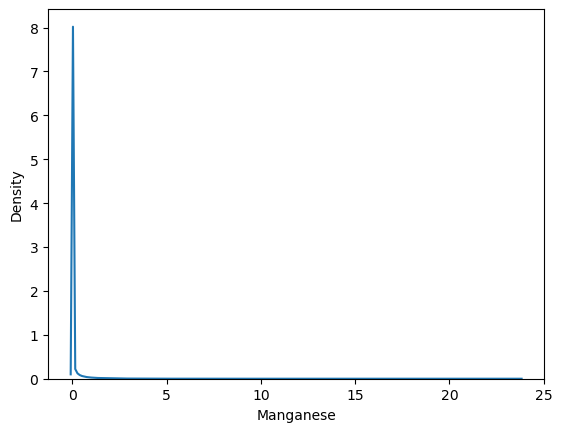

In [ ]:
for i in ['Conductivity','Chlorine','Manganese']:
    sns.kdeplot(df[i])
    plt.show()

NOTE : The Conductivity and Chlorine are lies in the Dataset was seems like a Normally Distributed and Manganese is lies like left skewed and Most of the datapoints lies 0 to 0.1 and remaining datapoints are lies above so it let to have a outliers

###### Total Dissolved Solids

Total Dissolved Solids (TDS) is a measure of the total concentration of dissolved substances in water. These substances can include minerals, salts, metals, ions, and other dissolved organic and inorganic compounds. TDS is an important parameter for assessing water quality and can provide insights into the composition of the water.

In [ ]:
df['Total Dissolved Solids'].min()

0.012183228

In [ ]:
df['Total Dissolved Solids'].max()

579.799458

<Axes: xlabel='Total Dissolved Solids', ylabel='Density'>

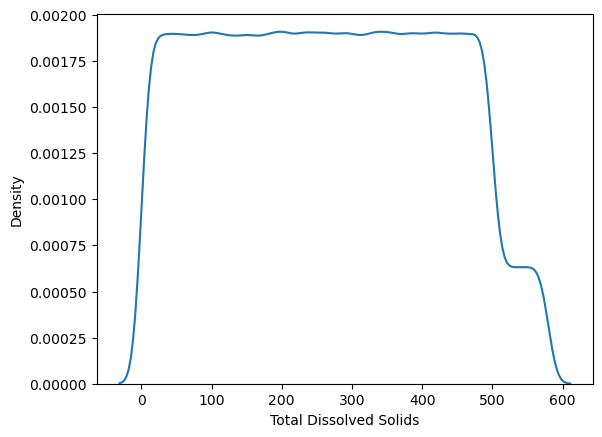

In [ ]:
sns.kdeplot(df['Total Dissolved Solids'])

NOTE : The plot says most the datapoints are lies in the Dataset was Good

###### Source

Where we Collect that Water Content

In [ ]:
df['Source'].unique()

array(['Lake', 'River', 'Spring', 'Ground', 'Stream', 'Reservoir',
       'Aquifer', 'Well'], dtype=object)

In [ ]:
df['Source'].value_counts()

Stream       88116
Well         87885
Ground       87807
Aquifer      87783
River        87603
Reservoir    87341
Spring       87287
Lake         87234
Name: Source, dtype: int64

<Axes: xlabel='Source', ylabel='count'>

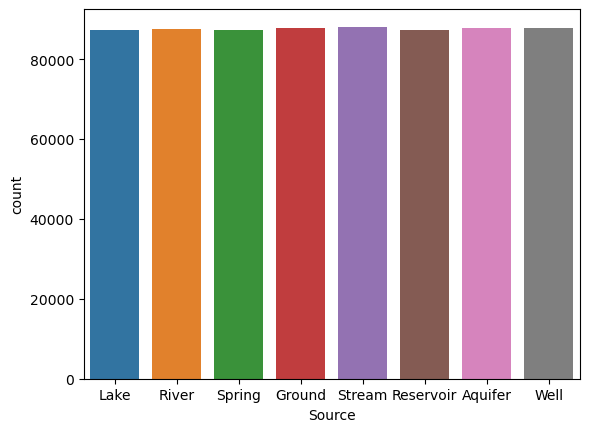

In [ ]:
sns.countplot(x=df['Source'])

NOTE : The Source are Equally included in the Dataset

###### Water Temperature and Air Temperature

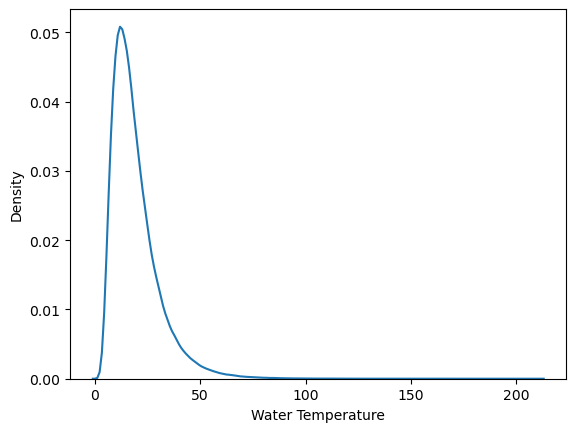

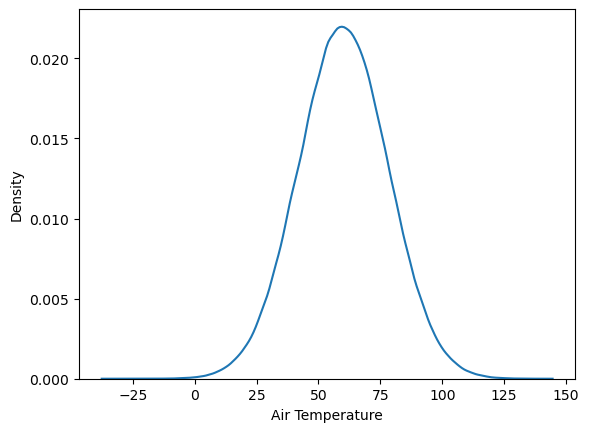

In [ ]:
for i in ['Water Temperature','Air Temperature']:
    sns.kdeplot(df[i])
    plt.show()

NOTE : Air Temperature is Normally Distributed but Water Temperature are Skewed

###### TARGET

The Quality of Water is Good or Bad

0 indicates Bad    
1 indicates Good

In [ ]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [ ]:
df['Target'].value_counts()

0    539773
1    161283
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

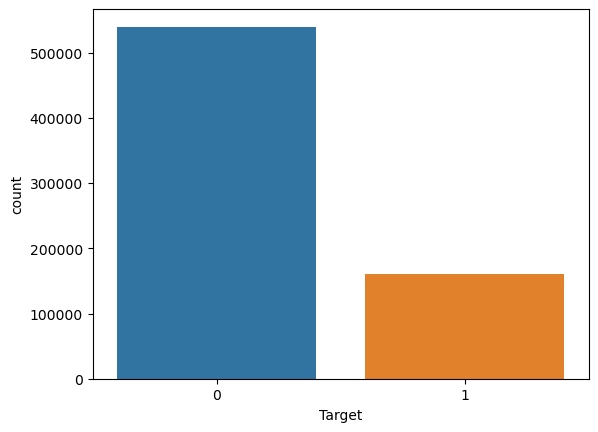

In [ ]:
sns.countplot(x=df['Target'])

NOTE : The 0 counts More than 1 so our dataset are Imbalanced

### Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701056 entries, 0 to 701055
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              701056 non-null  int64  
 1   pH                      701056 non-null  float64
 2   Iron                    701056 non-null  float64
 3   Nitrate                 701056 non-null  float64
 4   Chloride                701056 non-null  float64
 5   Lead                    701056 non-null  float64
 6   Zinc                    701056 non-null  float64
 7   Color                   701056 non-null  object 
 8   Turbidity               701056 non-null  float64
 9   Fluoride                701056 non-null  float64
 10  Copper                  701056 non-null  float64
 11  Odor                    701056 non-null  float64
 12  Sulfate                 701056 non-null  float64
 13  Conductivity            701056 non-null  float64
 14  Chlorine            

##### CHECK NULL VALUES

In [ ]:
df.isnull().sum()

Unnamed: 0                0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Target                    0
dtype: int64

There is No Null Values in Our Dataset

In [ ]:
df.shape

(701056, 21)

NOTE : Our Dataset Contains 0.7 Million Records and 21 Features

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### STATISTICS ABOUT DATA

###### Check Information About Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701056 entries, 0 to 701055
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      701056 non-null  float64
 1   Iron                    701056 non-null  float64
 2   Nitrate                 701056 non-null  float64
 3   Chloride                701056 non-null  float64
 4   Lead                    701056 non-null  float64
 5   Zinc                    701056 non-null  float64
 6   Color                   701056 non-null  object 
 7   Turbidity               701056 non-null  float64
 8   Fluoride                701056 non-null  float64
 9   Copper                  701056 non-null  float64
 10  Odor                    701056 non-null  float64
 11  Sulfate                 701056 non-null  float64
 12  Conductivity            701056 non-null  float64
 13  Chlorine                701056 non-null  float64
 14  Manganese           

NOTE : There are 2 Object DataType in Our Dataset So Convert that Data into Machine Readable Foramt

##### FEATURE ENCODING

As we saw Before there are two Features are Object Type So We try to do Target Mean Encoding for Both Source and Color Features

In [ ]:
encode = TargetEncoder()

In [ ]:
for i in ['Color','Source']:
    df[i] = encode.fit_transform(df[i],df['Target'])

In [ ]:
df.head(3)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,0.257145,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.020000e-07,284.641984,0.231687,15.348981,71.220586,0
1,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,0.388529,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,0.230723,11.643467,44.891330,0
2,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,0.388529,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,0.227961,15.249416,69.336671,0


###### DESCRIPTIVE STATS

In [ ]:
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
count,701056.000000,7.010560e+05,701056.000000,701056.000000,7.010560e+05,7.010560e+05,701056.000000,7.010560e+05,701056.000000,7.010560e+05,701056.000000,701056.000000,701056.000000,701056.000000,7.010560e+05,701056.000000,701056.000000,701056.000000,701056.000000,701056.000000
mean,7.448954,1.142417e-01,6.077584,181.887010,1.299793e-03,1.528468e+00,0.230057,4.838529e-01,0.941325,4.943811e-01,1.773779,144.634042,424.813810,3.236804,9.390013e-02,264.820722,0.230057,19.147659,60.043580,0.230057
std,0.847794,4.435925e-01,3.130819,65.789558,3.048436e-02,1.502938e+00,0.135378,8.633718e-01,0.792704,5.670135e-01,1.051451,66.801035,189.639525,0.715348,4.419629e-01,154.354905,0.001833,11.376865,18.083459,0.420870
min,2.058008,8.010000e-45,0.286173,29.413497,0.000000e+00,6.350000e-07,0.144896,1.410000e-14,0.000005,4.440000e-08,0.011006,11.940727,13.054824,1.020283,4.070000e-46,0.012183,0.226957,1.274254,-33.870915,0.000000
25%,6.914717,9.000000e-06,3.949197,137.421204,8.647500e-123,4.138602e-01,0.144896,3.703272e-02,0.370611,1.259449e-01,0.878178,97.473125,286.443339,2.737183,2.050000e-06,131.847798,0.228936,11.348949,47.852591,0.000000
50%,7.452758,2.063006e-03,5.564817,174.744666,1.695000e-62,1.075199e+00,0.145395,1.996362e-01,0.765630,3.391531e-01,1.745384,133.963219,397.070710,3.198447,5.372045e-04,263.521994,0.230276,16.462302,60.031030,0.000000
75%,8.000970,4.975946e-02,7.585966,215.711131,2.950000e-27,2.215828e+00,0.257145,5.923177e-01,1.318171,6.790050e-01,2.612347,180.357291,533.182405,3.684807,1.369826e-02,395.037247,0.231189,23.855208,72.236665,0.000000
max,12.891960,1.574860e+01,69.731244,1430.548852,3.503948e+00,2.836867e+01,0.598669,1.929611e+01,12.851710,1.071732e+01,4.141952,1367.627291,1891.515730,10.351240,2.374086e+01,579.799458,0.232743,210.821909,140.875607,1.000000


###### FIND NORMALITY OF THE DATA

In [ ]:
def Find_Normality(data):
    if data == 'Color' and data == 'Source' and data == 'Target':
        pass
    else:
        result = anderson(df[data])
        if result[0] < result[1][2]:
            return f'The {data} Feature is Noramlly Distributed'
        else:
            return f'The {data} Feature is Not Noramally Distributed'

In [ ]:
for i in df.columns:
    print(Find_Normality(i))
    print('--------------------------------------------------')

The pH Feature is Not Noramally Distributed
--------------------------------------------------
The Iron Feature is Not Noramally Distributed
--------------------------------------------------
The Nitrate Feature is Not Noramally Distributed
--------------------------------------------------
The Chloride Feature is Not Noramally Distributed
--------------------------------------------------
The Lead Feature is Not Noramally Distributed
--------------------------------------------------
The Zinc Feature is Not Noramally Distributed
--------------------------------------------------
The Color Feature is Not Noramally Distributed
--------------------------------------------------
The Turbidity Feature is Not Noramally Distributed
--------------------------------------------------
The Fluoride Feature is Not Noramally Distributed
--------------------------------------------------
The Copper Feature is Not Noramally Distributed
--------------------------------------------------
The Odor Feat

NOTE : There is Only Feature is Like 'Air Temperature' is Normally Distributed and all other Features are Not Normally Distributed

### Anomaly Detection

As we see there are lot of Columns in Our Dataset and Most of the Columns Distribution are Skewed and There is Lot of Chances to get a Outliers. In this Case we Use DBSCAN Clustering to Detect Noise Points and Isolation Forest to Detect Outliers

###### DBSCAN

In [ ]:
X = df.iloc[:,:-1]

In [ ]:
distance = NearestNeighbors()

In [ ]:
eps = distance.fit(X)

In [ ]:
distances,indices = eps.kneighbors(X)

In [ ]:
Sort = np.sort(distances,axis=0)

In [ ]:
dist = Sort[:,-1]

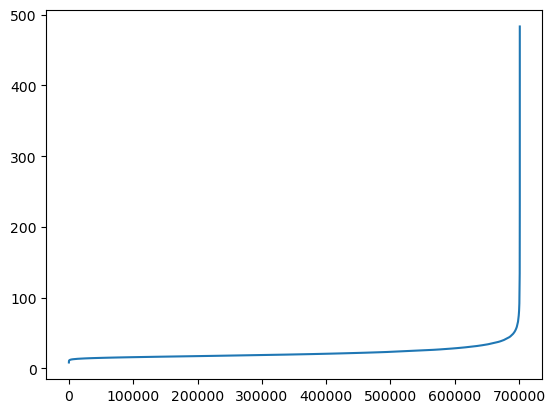

In [ ]:
plt.plot(dist)

In [ ]:
Noise = DBSCAN(eps=30,min_samples=5)

In [ ]:
pred = Noise.fit_predict(X)

In [ ]:
len(pred)

701056

In [ ]:
val_1 = []
for i,j in enumerate(pred):
    if j == -1:
        val_1.append(i)

In [ ]:
len(val_1)

50629

###### Isolation Forest

In [ ]:
outlier = IsolationForest()

In [ ]:
pred_1 = outlier.fit_predict(X)

In [ ]:
pred_1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
val_2 = []
for i,j in enumerate(pred_1):
    if j==-1:
        val_2.append(i)

In [ ]:
len(val_2)

45664

In [ ]:
val3 = []
a = list(val_1)
b = list(val_2)
for i in a:
    if i in b:
        val3.append(i)
len(val3)

14545

So Overall 14545 outliers in Our Dataset So we Remove all the Outliers

In [ ]:
df.drop(val3,inplace=True)

In [ ]:
df.shape

(686511, 20)

###### Feature Scaling

Already Most of the Features datapoints are Range InBetween 0 to 1 but Some of the Features are range in High so We use MinMaxScaler for all Independence Features

In [ ]:
scale = MinMaxScaler()

In [ ]:
for i in df.columns:
    if i == 'Target':
        continue
    else:
        df[i] = scale.fit_transform(df[[i]])

In [ ]:
df.head(3)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Target
0,0.448576,0.000005,0.056642,0.141040,2.240330e-94,0.043898,0.247368,0.001012,0.049883,0.040853,0.405486,0.097419,0.223476,0.243464,3.378142e-08,0.490923,0.817521,0.067167,0.597104,0
1,0.312513,0.001277,0.058002,0.143871,1.509726e-76,0.018622,0.536905,0.017038,0.033910,0.040270,0.823931,0.194559,0.520185,0.272206,2.951868e-03,0.983194,0.650813,0.049484,0.444812,0
2,0.556944,0.000138,0.158354,0.112143,1.190086e-132,0.134215,0.536905,0.000259,0.017852,0.057531,0.189861,0.120481,0.198019,0.231227,1.388382e-04,0.289872,0.173407,0.066692,0.586207,0


NOTE : Now all the Independent datapoints lies InBetween the Range of 0 to 1

In [ ]:
df.shape

(686511, 20)

###### Create Independent and Dependent Variables

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

###### TRAIN TEST SPLIT

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((480557, 19), (205954, 19), (480557,), (205954,))

###### BUILD NAIVE BAYES MODEL

In [ ]:
Naive_Model = GaussianNB()

In [ ]:
Naive_Model.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
pred_train_1 = Naive_Model.predict(xtrain)
pred_test_1 = Naive_Model.predict(xtest)

In [ ]:
print('Naive Bayes Model Train Accuracy => ',accuracy_score(ytrain,pred_train_1))

Naive Bayes Model Train Accuracy =>  0.8296726506949228


In [ ]:
print('Naive Bayes Model Test Accuracy => ',accuracy_score(ytest,pred_test_1))

Naive Bayes Model Test Accuracy =>  0.8290880487875933


In [ ]:
print(classification_report(ytest,pred_test_1))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89    160210
           1       0.65      0.51      0.57     45744

    accuracy                           0.83    205954
   macro avg       0.76      0.71      0.73    205954
weighted avg       0.82      0.83      0.82    205954



###### BUILD RANDOM FOREST MODEL

In [ ]:
Forest_Model = RandomForestClassifier()

In [ ]:
Forest_Model.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
pred_train_2 = Forest_Model.predict(xtrain)
pred_test_2 = Forest_Model.predict(xtest)

In [ ]:
print('Random Forest Model Train Accuracy => ',accuracy_score(ytrain,pred_train_2))

Random Forest Model Train Accuracy =>  0.9999958381627986


In [ ]:
print('Random Forest Model Test Accuracy => ',accuracy_score(ytest,pred_test_2))

Random Forest Model Test Accuracy =>  0.8779970284626665


In [ ]:
print(classification_report(ytest,pred_test_2))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92    160210
           1       0.65      0.96      0.78     45744

    accuracy                           0.88    205954
   macro avg       0.82      0.91      0.85    205954
weighted avg       0.91      0.88      0.89    205954



NOTE : By Looking at the Classification Report the 0 value predicted by Both alogorithm was Doing Good but 1 value predicted by Both Alogorithm was doing Bad

<Axes: xlabel='Target', ylabel='count'>

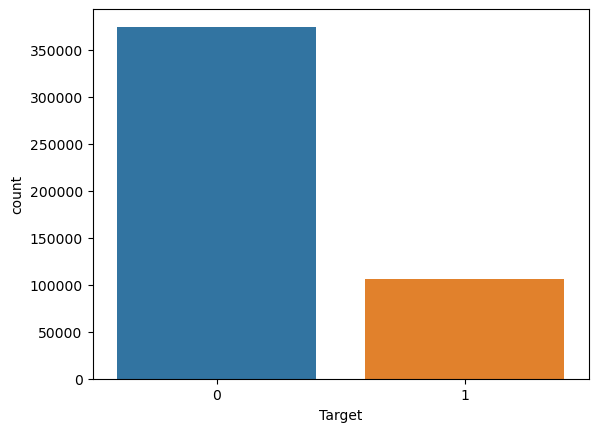

In [ ]:
sns.countplot(x=ytrain)

NOTE : Our Model is Imabalanced Dataset So the Accuracy was little Less So We Use Stratified KFold to Solve this Problem

### RESOLVE IMABALANCED DATA

##### Using Stratified KFold Cross Validation

In [ ]:
Stratified = StratifiedKFold(n_splits=5)

In [ ]:
Result = cross_val_score(Naive_Model,x,y,cv=Stratified)

In [ ]:
Result

array([0.82942106, 0.8265648 , 0.8316849 , 0.82972571, 0.83024282])

In [ ]:
np.mean(Result)

0.8295278591410739

By Doing Stratified KFold this Problem was not Solved So we want do some other Techniques

#### Using SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
print('AFTER USING SMOTE Y TRAIN :',Counter(y))

AFTER USING SMOTE Y TRAIN : Counter({0: 534654, 1: 151857})


In [ ]:
X1 , Y1 = smote.fit_resample(x,y)

In [ ]:
print('AFTER USING SMOTE Y TRAIN :',Counter(Y1))

AFTER USING SMOTE Y TRAIN : Counter({0: 534654, 1: 534654})


In [ ]:
XTrain,XTest,YTrain,YTest = train_test_split(X1,Y1,test_size=0.30,random_state=0)

###### XGBoost

In [ ]:
XGB = xgb.XGBClassifier()

In [ ]:
XGB.fit(XTrain,YTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_train_xgb_1 = XGB.predict(XTrain)
pred_test_xgb_1 = XGB.predict(XTest)

In [ ]:
print('XGBoost Model Train Accuracy => ',accuracy_score(YTrain,pred_train_xgb_1))

XGBoost Model Train Accuracy =>  0.9067139603080766


In [ ]:
print('XGBoost Model Test Accuracy => ',accuracy_score(YTest,pred_test_xgb_1))

XGBoost Model Test Accuracy =>  0.9011979687836081


In [ ]:
print(classification_report(YTest,pred_test_xgb_1))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90    160411
           1       0.87      0.94      0.90    160382

    accuracy                           0.90    320793
   macro avg       0.90      0.90      0.90    320793
weighted avg       0.90      0.90      0.90    320793



###### Random Forest

In [ ]:
Forest_Model.fit(XTrain,YTrain)

RandomForestClassifier()

In [ ]:
pred_Train_Forest_1 = Forest_Model.predict(XTrain)
pred_Test_Forest_1 = Forest_Model.predict(XTest)

In [ ]:
print('Random Forest Model Train Accuracy => ',accuracy_score(YTrain,pred_Train_Forest_1))

Random Forest Model Train Accuracy =>  0.9999893121714327


In [ ]:
print('Random Forest Model Test Accuracy => ',accuracy_score(YTest,pred_Test_Forest_1))

Random Forest Model Test Accuracy =>  0.9153846873217308


In [ ]:
print(classification_report(YTest,pred_Test_Forest_1))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91    160411
           1       0.87      0.98      0.92    160382

    accuracy                           0.92    320793
   macro avg       0.92      0.92      0.92    320793
weighted avg       0.92      0.92      0.92    320793



NOTE : SMOTE gives good accuracy in RandomForest Model But we want to imporve accuracy Much Better so we use SMOTEENN

##### Using SMOTEENN

In [ ]:
smoteenn = SMOTEENN()

In [ ]:
print('AFTER USING SMOTEENN Y TRAIN :',Counter(y))

AFTER USING SMOTEENN Y TRAIN : Counter({0: 534654, 1: 151857})


In [ ]:
X_1 , Y_1 = smoteenn.fit_resample(x,y)

In [ ]:
print('AFTER USING SMOTE Y TRAIN :',Counter(Y_1))

AFTER USING SMOTE Y TRAIN : Counter({1: 497892, 0: 408412})


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y_1,test_size=0.30,random_state=0)

###### XGBoost

In [ ]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_Train_xgb_1 = XGB.predict(X_train)
pred_Test_xgb_1 = XGB.predict(X_test)

In [ ]:
print('XGBoost Model Train Accuracy => ',accuracy_score(Y_train,pred_Train_xgb_1))

XGBoost Model Train Accuracy =>  0.9723996393510842


In [ ]:
print('XGBoost Model Test Accuracy => ',accuracy_score(Y_test,pred_Test_xgb_1))

XGBoost Model Test Accuracy =>  0.9694216821384962


In [ ]:
print(classification_report(Y_test,pred_Test_xgb_1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    122682
           1       0.97      0.98      0.97    149210

    accuracy                           0.97    271892
   macro avg       0.97      0.97      0.97    271892
weighted avg       0.97      0.97      0.97    271892



###### Random Forest

In [ ]:
Forest_Model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
pred_Train_Forest_2 = Forest_Model.predict(X_train)
pred_Test_Forest_2 = Forest_Model.predict(X_test)

In [ ]:
print('Random Forest Model Train Accuracy => ',accuracy_score(Y_train,pred_Train_Forest_2))

Random Forest Model Train Accuracy =>  0.9999795085843269


In [ ]:
print('Random Forest Model Test Accuracy => ',accuracy_score(Y_test,pred_Test_Forest_2))

Random Forest Model Test Accuracy =>  0.9734857958306975


In [ ]:
print(classification_report(Y_test,pred_Test_Forest_2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    122682
           1       0.97      0.99      0.98    149210

    accuracy                           0.97    271892
   macro avg       0.97      0.97      0.97    271892
weighted avg       0.97      0.97      0.97    271892



NOTE : Our Final Conclusion is the Both Model XGBoost and Random Forest gives Good accuracy...